In [1]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

# Analyse de la base de données

In [2]:
print(digits["feature_names"])
print(digits["target_names"])
print(digits["data"].shape)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]
(1797, 64)


## 1 - Dimension
On remarque que les images comprises dans le dataset sont de dimensions 8x8 pixels, soit d'une taille de 64 descripteurs. Le dataset comporte 1797 exemples, soit 1797 images.

In [3]:
print(digits["data"])
print(digits["target"])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [4]:
unique, counts = np.unique(digits["target"], return_counts=True)
print(dict(zip(unique, counts)))

{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


On peut voir que chaque classe est quasiment identiquement représenté.

<Figure size 432x288 with 0 Axes>

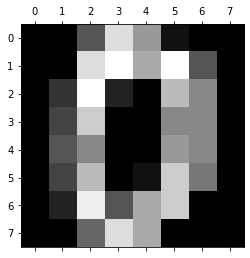

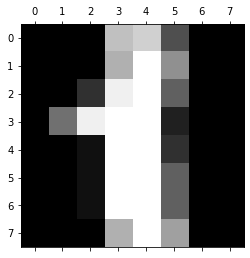

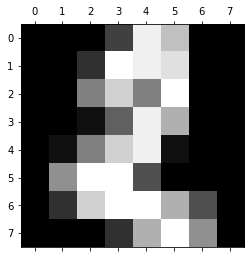

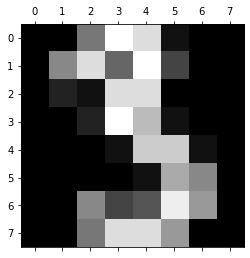

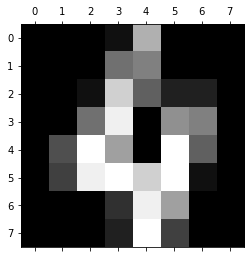

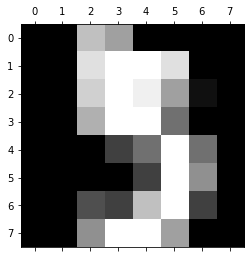

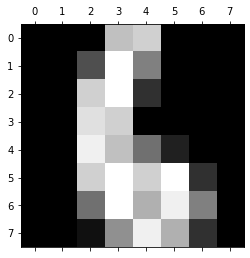

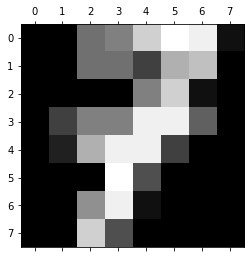

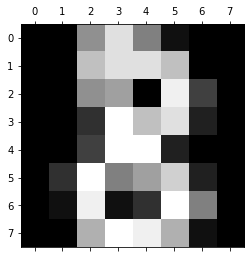

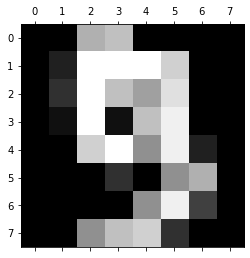

In [5]:
import matplotlib.pyplot as plt

plt.gray()
#for i in range((digits["data"]).shape[0]):
for i in range(10):
    plt.matshow(digits.images[i]) #index = numéro image
    plt.show()

## 2 - Séparation et test

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits["data"], digits["target"], random_state=42, train_size=0.7)
OneNN = KNeighborsClassifier(n_neighbors=1)

OneNN.fit(X_train, y_train)
print("Trained")

KNN_predict = OneNN.predict(X_test)

Trained


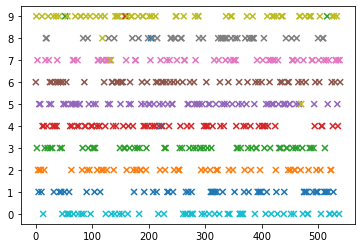

Mesure du taux de reconnaissance 0.9833333333333333


In [7]:
y_axis = y_test
color_tab = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
colors = []

for i in range(KNN_predict.shape[0]):
    colors.append(color_tab[KNN_predict[i]-1])

plt.yticks(digits["target_names"])
plt.scatter(range(0,y_test.shape[0]), y_axis, marker='x', c=colors)
plt.show()

print("Mesure du taux de reconnaissance "+str(accuracy_score(y_test, KNN_predict)))

# Analyse en composantes principales

## 1 - Solveur PCA

In [8]:
X_train_64 = X_train

from sklearn.decomposition import PCA
pca = PCA(n_components = 64)
pca.fit(X_train_64)

PCA(n_components=64)

On utilise une base d'entraînement distincte pour entraîner le modèle. La base de test sert à confirmer l'entraînement avecdes éléments que le modèle n'a jamais rencontré, et donc sur lequel il n'a pas pu s'entraîner.

## 2 - Graphe d'inertie

In [9]:
variance = pca.explained_variance_ratio_*100 #calculate variance ratios

var=np.cumsum(np.round(variance, decimals=3))

In [10]:
import seaborn as sb

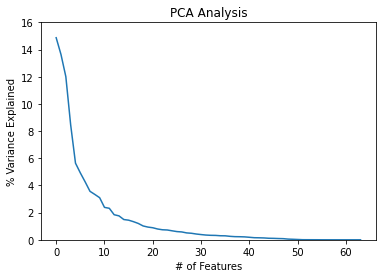

In [11]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,16)
plt.style.context('seaborn-whitegrid')

plt.plot(variance)

Le nombre de dimensions étant élevé (64), nous ne pouvons pas appliquer le critère de Catell

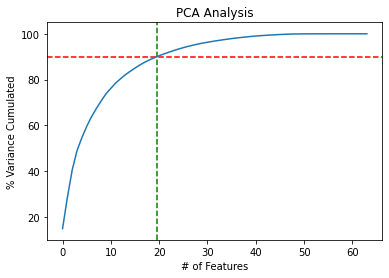

In [12]:
plt.ylabel('% Variance Cumulated')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(10,105)
plt.style.context('seaborn-whitegrid')

plt.axhline(y=90, color='r', linestyle='--')
plt.axvline(x=19.5, color='g', linestyle='--')

plt.plot(var)

plt.show()

Graphiquement, pour satisfaire le critère de Joliffe à 90%, il nous faut garder 20 composantes

# Classification

## 1 - M premières composantes principales

In [13]:
pca = PCA(n_components=20)
X_train_20 = pca.fit_transform(X_train)
X_test_20 = pca.transform(X_test)

In [14]:
X_train_20

array([[ -5.23975272,   9.95876447,  -3.96539752, ...,   1.72155257,
          4.40167579,   0.23474189],
       [ -1.38392036, -17.3592055 , -17.6547342 , ...,  -7.55423279,
          2.13430674,  -0.06603006],
       [  9.26126178,  -8.52459555,  22.72038964, ...,  -4.78435802,
         -3.6271703 ,   2.24727372],
       ...,
       [-13.09234503, -10.60533347,  -1.62512136, ...,  -1.60389593,
          3.79016282,  -0.21755367],
       [  3.59709542,  -7.88611126, -16.5298591 , ...,   6.24560256,
          1.47628565,   2.81789551],
       [ 13.9406133 , -18.07369889,  11.111333  , ...,  -1.1123405 ,
         -0.82475223,  -0.93310204]])

In [15]:
OneNN.fit(X_train_20, y_train)
print("Trained")

KNN_predict = OneNN.predict(X_test_20)

Trained


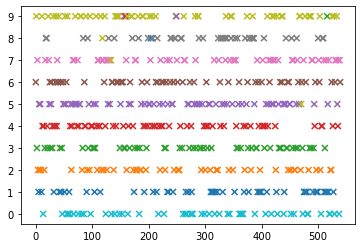

Mesure du taux de reconnaissance 0.9851851851851852


In [16]:
y_axis = y_test
color_tab = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
colors = []

for i in range(KNN_predict.shape[0]):
    colors.append(color_tab[KNN_predict[i]-1])

plt.yticks(digits["target_names"])
plt.scatter(range(0,y_test.shape[0]), y_axis, marker='x', c=colors)
plt.show()

print("Mesure du taux de reconnaissance "+str(accuracy_score(y_test, KNN_predict)))

## 2 - Extension de l'analyse

In [17]:
accuracy = []

for i in range(digits["data"].shape[1]):
    pca = PCA(n_components=i+1)
    X_train_i = pca.fit_transform(X_train)
    X_test_i = pca.transform(X_test)

    OneNN.fit(X_train_i, y_train)

    KNN_predict = OneNN.predict(X_test_i)
    accuracy.append(accuracy_score(y_test, KNN_predict))
    print("M = "+str(i+1),"Taux de reconnaissance "+str(accuracy[i]))

M = 1 Taux de reconnaissance 0.3037037037037037
M = 2 Taux de reconnaissance 0.5814814814814815
M = 3 Taux de reconnaissance 0.7148148148148148
M = 4 Taux de reconnaissance 0.8351851851851851
M = 5 Taux de reconnaissance 0.9203703703703704
M = 6 Taux de reconnaissance 0.9259259259259259
M = 7 Taux de reconnaissance 0.9611111111111111
M = 8 Taux de reconnaissance 0.9722222222222222
M = 9 Taux de reconnaissance 0.975925925925926
M = 10 Taux de reconnaissance 0.9777777777777777
M = 11 Taux de reconnaissance 0.9814814814814815
M = 12 Taux de reconnaissance 0.9796296296296296
M = 13 Taux de reconnaissance 0.9796296296296296
M = 14 Taux de reconnaissance 0.9833333333333333
M = 15 Taux de reconnaissance 0.9796296296296296
M = 16 Taux de reconnaissance 0.9851851851851852
M = 17 Taux de reconnaissance 0.9851851851851852
M = 18 Taux de reconnaissance 0.9851851851851852
M = 19 Taux de reconnaissance 0.9851851851851852
M = 20 Taux de reconnaissance 0.9851851851851852
M = 21 Taux de reconnaissance 

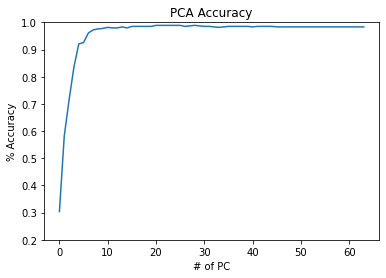

In [18]:
plt.ylabel('% Accuracy')
plt.xlabel('# of PC')
plt.title('PCA Accuracy')
plt.ylim(0.2,1)
plt.style.context('seaborn-whitegrid')

plt.plot(accuracy)

# Compression

## 1 - Reconstruction

In [19]:
pca = PCA(n_components=20)
X_train_20 = pca.fit_transform(X_train)

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

#print("Eigenvalues :\n", eigenvalues)
print("Eigenvalues :", eigenvalues.shape)
#print("\nEigenvectors :\n", eigenvectors)
print("Eigenvectors :", eigenvectors.shape)

Eigenvalues : (20,)
Eigenvectors : (20, 64)


In [20]:
from statistics import mean

digits_mean = []
for i in range(digits["data"].shape[1]):
    digits_mean.append(mean(digits["data"][:,i]))

print(digits_mean)
print(len(digits_mean))

[0.0, 0.3038397328881469, 5.204785754034502, 11.835837506956038, 11.848080133555927, 5.781858653311074, 1.3622704507512522, 0.1296605453533667, 0.005564830272676683, 1.9938786867000557, 10.382303839732888, 11.979410127991097, 10.279354479688369, 8.175848636616584, 1.8464106844741235, 0.10795770728992765, 0.0027824151363383415, 2.6015581524763496, 9.903171953255425, 6.9927657206455205, 7.09794101279911, 7.806343906510851, 1.788536449638286, 0.05008347245409015, 0.0011129660545353367, 2.4696716750139123, 9.091263216471898, 8.821368948247079, 9.927100723427936, 7.55147468002226, 2.3177518085698385, 0.0022259321090706734, 0.0, 2.3394546466332775, 7.6672231496939345, 9.07178631051753, 10.301613800779077, 8.744017807456872, 2.90929326655537, 0.0, 0.008903728436282694, 1.5837506956037841, 6.881469115191987, 7.228158041179744, 7.672231496939343, 8.23650528658876, 3.456316082359488, 0.027267668336115748, 0.007234279354479688, 0.7045075125208681, 7.506956037840846, 9.53923205342237, 9.4162493043

In [21]:
C = []
X_m = []
for i in range(digits["data"].shape[0]):
    X_m.append(digits.data[i] - digits_mean)
    tmp = []
    for j in range(20):
        tmp.append(np.dot(eigenvectors[j], X_m[i]))
    C.append(tmp)
    
C = np.array(C)
print(C.shape)

(1797, 20)


<Figure size 432x288 with 0 Axes>

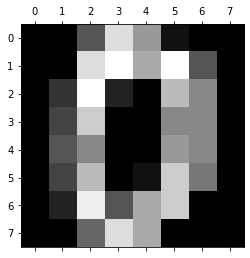

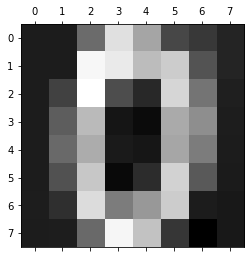

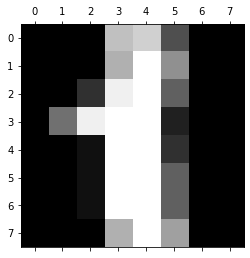

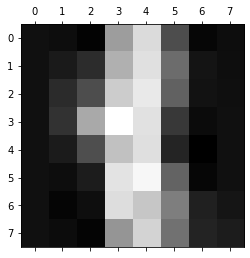

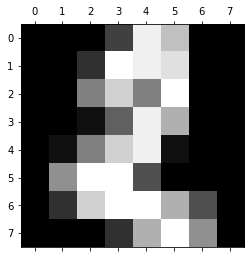

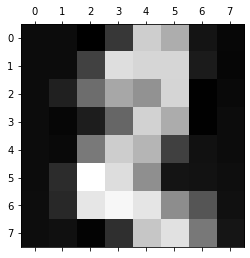

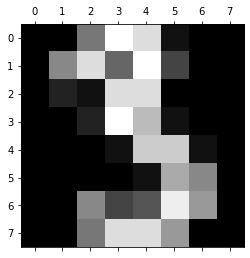

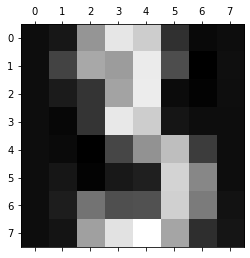

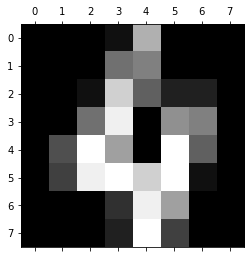

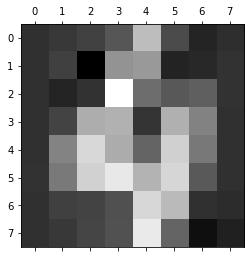

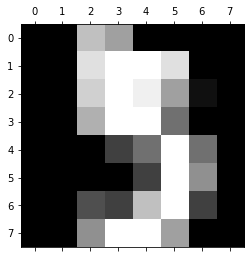

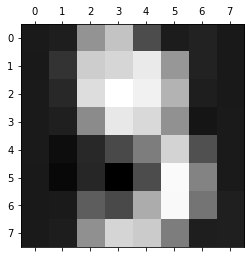

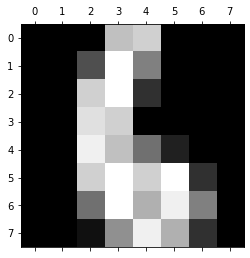

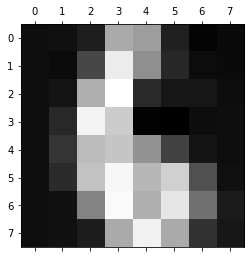

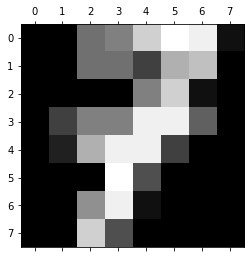

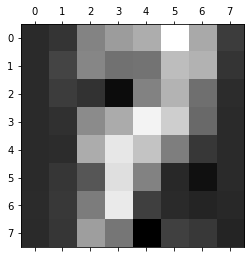

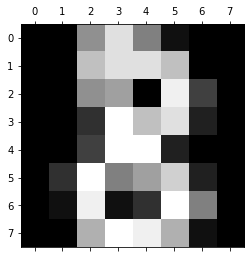

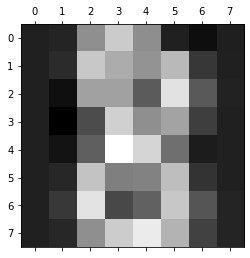

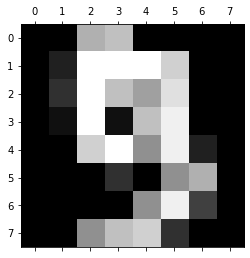

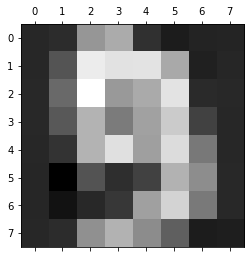

In [22]:
reconstruct = []

for i in range(digits["data"].shape[0]):
    reconstruct.append(digits_mean)

    for j in range(20):
        reconstruct[i] += C[i][j]*eigenvectors[j]
    
#---------------------------------#
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i]) #index = numéro image

    reconstruct_img = []
    for j in range(8):
        tmp = []
        for k in range(8):
            tmp.append(reconstruct[i][j*8+k])
        reconstruct_img.append(tmp)

    plt.matshow(reconstruct_img)
    plt.show()
#---------------------------------#

## 2 - Erreur

In [23]:
reconstruct_error = []
for i in range(digits["data"].shape[0]):
    reconstruct_error.append(abs(reconstruct[i] - digits.data[i]))

reconstruct_error = np.array(reconstruct_error)
print(reconstruct_error.shape)

reconstruct_error_mean = []
for i in range(digits["data"].shape[0]):
    reconstruct_error_mean.append(mean(reconstruct_error[i]))

reconstruct_error_mean = np.array(reconstruct_error_mean)
print(len(reconstruct_error_mean))

reconstruct_error_mean *= 100/16
print("Erreurs de reconstructions par image :\n", reconstruct_error_mean)

(1797, 64)
1797
Erreurs de reconstructions par image :
 [4.66489174 5.88139023 5.58272731 ... 6.62658345 5.57970402 6.05742031]


In [24]:
reconstruct_error_global = mean(reconstruct_error_mean)
print("Erreur de reconstructions globale :\n", reconstruct_error_global)

Erreurs de reconstructions globale :
 5.955992088934166


## 3 - Extension de l'analyse

In [32]:
exemples = digits["data"].shape[0]
features = digits["data"].shape[1]
reconstruct_error_global = []

for size in range(features):
    #-----------------PCA-----------------#
    pca = PCA(n_components=size+1)
    X_train_i = pca.fit_transform(X_train)
    
    eigenvectors = pca.components_
    
    #-------------COMPRESSION-------------#
    C = []
    X_m = []
    for i in range(exemples):
        X_m.append(digits.data[i] - digits_mean)
        tmp = []
        for j in range(size+1):
            tmp.append(np.dot(eigenvectors[j], X_m[i]))
        C.append(tmp)
    
    #------------RECONSTRUCTION-----------#    
    reconstruct = []
    for i in range(exemples):
        reconstruct.append(digits_mean)
        for j in range(size+1):
            reconstruct[i] += C[i][j]*eigenvectors[j]
            
    #----------------ERREUR---------------#    
    reconstruct_error = []
    for i in range(exemples):
        reconstruct_error.append(abs(reconstruct[i] - digits.data[i]))

    reconstruct_error_mean = []
    for i in range(exemples):
        reconstruct_error_mean.append(mean(reconstruct_error[i]))

    reconstruct_error_global.append(mean(reconstruct_error_mean) * 100/16)
    print("Erreur de reconstructions globale pour N =",size+1, ":\n", reconstruct_error_global[size])

Erreur de reconstructions globale pour N = 1 :
 17.311437105245357
Erreur de reconstructions globale pour N = 2 :
 15.503245288059667
Erreur de reconstructions globale pour N = 3 :
 14.075936847060088
Erreur de reconstructions globale pour N = 4 :
 12.989368803577586
Erreur de reconstructions globale pour N = 5 :
 12.198853781548344
Erreur de reconstructions globale pour N = 6 :
 11.468874606396634
Erreur de reconstructions globale pour N = 7 :
 10.887567230205237
Erreur de reconstructions globale pour N = 8 :
 10.28190030309981
Erreur de reconstructions globale pour N = 9 :
 9.750495198091203
Erreur de reconstructions globale pour N = 10 :
 9.228463551607677
Erreur de reconstructions globale pour N = 11 :
 8.844718850199012
Erreur de reconstructions globale pour N = 12 :
 8.44647031377162
Erreur de reconstructions globale pour N = 13 :
 8.075826068010636
Erreur de reconstructions globale pour N = 14 :
 7.702539092569976
Erreur de reconstructions globale pour N = 15 :
 7.37840444497616

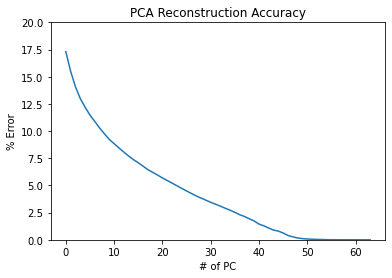

In [33]:
plt.ylabel('% Error')
plt.xlabel('# of PC')
plt.title('PCA Reconstruction Accuracy')
plt.ylim(0,20)
plt.style.context('seaborn-whitegrid')

plt.plot(reconstruct_error_global)